In [1]:
#Bibliotecas
import pandas as pd
from pandas import Series, DataFrame, Panel
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot_date, axis, show, gcf
import numpy as np
from urllib.request import Request, urlopen
import urllib
from http.cookiejar import CookieJar
import numpy as np
from datetime import datetime, timedelta

# Conexão com a API do Brasil.IO e manipulação e organização dos dados

In [2]:
cj = CookieJar()

In [3]:
url_Bso = "https://brasil.io/api/dataset/covid19/caso_full/data?state=MG&city=Barroso"
req_Bso = urllib.request.Request(url_Bso, None, {"User-Agent": "python-urllib"})
opener_Bso = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
response_Bso = opener_Bso.open(req_Bso)
raw_response_Bso = response_Bso.read()

In [4]:
json_Bso = pd.read_json(raw_response_Bso)
results_Bso = json_Bso['results']
results_Bso = results_Bso.to_dict().values()
df_Bso = pd.DataFrame(results_Bso)
df_Bso.head(5)

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,order_for_place,place_type,state
0,Barroso,3105905,2020-07-21,30,20810,True,False,49,235.46372,2020-07-21,0.0,0,0,0,66,city,MG
1,Barroso,3105905,2020-07-20,30,20810,False,False,49,235.46372,2020-07-20,0.0,0,0,0,65,city,MG
2,Barroso,3105905,2020-07-19,30,20810,False,False,49,235.46372,2020-07-19,0.0,0,0,0,64,city,MG
3,Barroso,3105905,2020-07-18,29,20810,False,False,49,235.46372,2020-07-18,0.0,0,0,0,63,city,MG
4,Barroso,3105905,2020-07-17,29,20810,False,False,49,235.46372,2020-07-17,0.0,0,1,0,62,city,MG


In [9]:
today = datetime.now()

last_sat_num = (today.weekday() + 2) % 7
last_thu_num = (today.weekday() + 4) % 7

last_sat = today - timedelta(last_sat_num)
last_thu = today - timedelta(last_thu_num)
last_sat_str = last_sat.strftime('%Y-%m-%d')
last_thu_str = last_thu.strftime('%Y-%m-%d')

last_available_confirmed_day_Bso_sat = 66
last_available_confirmed_day_Bso_thu = 63

df_Bso2 = df_Bso.copy()
df_Bso2.loc[df_Bso2['date'] == last_sat_str, ['last_available_confirmed']] = last_available_confirmed_day_Bso_sat
df_Bso2.loc[df_Bso2['date'] == last_thu_str, ['last_available_confirmed']] = last_available_confirmed_day_Bso_thu

df_Bso2

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,order_for_place,place_type,state
0,Barroso,3105905,2020-07-21,30,20810,True,False,49,235.46372,2020-07-21,0.0,0,0,0,66,city,MG
1,Barroso,3105905,2020-07-20,30,20810,False,False,49,235.46372,2020-07-20,0.0,0,0,0,65,city,MG
2,Barroso,3105905,2020-07-19,30,20810,False,False,49,235.46372,2020-07-19,0.0,0,0,0,64,city,MG
3,Barroso,3105905,2020-07-18,29,20810,False,False,66,235.46372,2020-07-18,0.0,0,0,0,63,city,MG
4,Barroso,3105905,2020-07-17,29,20810,False,False,49,235.46372,2020-07-17,0.0,0,1,0,62,city,MG
5,Barroso,3105905,2020-07-16,29,20810,False,False,63,230.65834,2020-07-16,0.0,0,4,0,61,city,MG
6,Barroso,3105905,2020-07-15,29,20810,False,False,44,211.43681,2020-07-15,0.0,0,1,0,60,city,MG
7,Barroso,3105905,2020-07-14,29,20810,False,False,43,206.63143,2020-07-14,0.0,0,3,0,59,city,MG
8,Barroso,3105905,2020-07-13,29,20810,False,False,40,192.21528,2020-07-13,0.0,0,0,0,58,city,MG
9,Barroso,3105905,2020-07-12,29,20810,False,False,40,192.21528,2020-07-12,0.0,0,0,0,57,city,MG


In [6]:
df_Bso2.to_csv('/home/gustavo/Desktop/CsvCovid/csvBso/BoletimEpidemiologico' + last_thu_str + '.csv')

In [7]:
url_Bq = "https://brasil.io/api/dataset/covid19/caso_full/data?state=MG&city=Barbacena"
req_Bq = urllib.request.Request(url_Bq, None, {"User-Agent": "python-urllib"})
opener_Bq = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
response_Bq = opener_Bq.open(req_Bq)
raw_response_Bq = response_Bq.read()

In [8]:
json_Bq = pd.read_json(raw_response_Bq)
results_Bq = json_Bq['results']
results_Bq = results_Bq.to_dict().values()
df_Bq = pd.DataFrame(results_Bq)
df_Bq.head(5)

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,order_for_place,place_type,state
0,Barbacena,3105608,2020-07-21,30,137313,True,False,458,333.54453,2020-07-21,0.0153,7,1,0,111,city,MG
1,Barbacena,3105608,2020-07-20,30,137313,False,False,457,332.81627,2020-07-20,0.0153,7,4,0,110,city,MG
2,Barbacena,3105608,2020-07-19,30,137313,False,False,453,329.90321,2020-07-19,0.0155,7,0,0,109,city,MG
3,Barbacena,3105608,2020-07-18,29,137313,False,False,453,329.90321,2020-07-18,0.0155,7,13,-1,108,city,MG
4,Barbacena,3105608,2020-07-17,29,137313,False,False,440,320.43579,2020-07-17,0.0182,8,6,-1,107,city,MG


In [16]:
last_available_confirmed_day_Bq_sat = 456
last_available_confirmed_day_Bq_thu = 440

df_Bq2 = df_Bq.copy()
df_Bq2.loc[df_Bq2['date'] == last_sat_str, ['last_available_confirmed']] = last_available_confirmed_day_Bq_sat
df_Bq2.loc[df_Bq2['date'] == last_thu_str, ['last_available_confirmed']] = last_available_confirmed_day_Bq_thu

df_Bq2

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,order_for_place,place_type,state
0,Barbacena,3105608,2020-07-18,29,137313,False,True,456,320.43579,2020-07-17,0.0182,8,0,0,108,city,MG
1,Barbacena,3105608,2020-07-17,29,137313,True,False,440,320.43579,2020-07-17,0.0182,8,6,-1,107,city,MG
2,Barbacena,3105608,2020-07-16,29,137313,False,False,440,316.06621,2020-07-16,0.0207,9,5,0,106,city,MG
3,Barbacena,3105608,2020-07-15,29,137313,False,False,429,312.42490,2020-07-15,0.0210,9,12,2,105,city,MG
4,Barbacena,3105608,2020-07-14,29,137313,False,False,417,303.68574,2020-07-14,0.0168,7,3,1,104,city,MG
5,Barbacena,3105608,2020-07-13,29,137313,False,False,414,301.50095,2020-07-13,0.0145,6,1,0,103,city,MG
6,Barbacena,3105608,2020-07-12,29,137313,False,False,413,300.77269,2020-07-12,0.0145,6,2,0,102,city,MG
7,Barbacena,3105608,2020-07-11,28,137313,False,False,411,299.31616,2020-07-11,0.0146,6,9,0,101,city,MG
8,Barbacena,3105608,2020-07-10,28,137313,False,False,402,292.76179,2020-07-10,0.0149,6,6,1,100,city,MG
9,Barbacena,3105608,2020-07-09,28,137313,False,False,396,288.39221,2020-07-09,0.0126,5,4,0,99,city,MG


In [17]:
df_Bq2.to_csv('/home/gustavo/Desktop/CsvCovid/csvBq/BoletimEpidemiologico' + last_thu_str + '.csv')

In [18]:
url_Sj = "https://brasil.io/api/dataset/covid19/caso_full/data/?state=MG&city=S%C3%A3o+Jo%C3%A3o+del+Rei"
req_Sj = urllib.request.Request(url_Sj, None, {"User-Agent": "python-urllib"})
opener_Sj = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
response_Sj = opener_Sj.open(req_Sj)
raw_response_Sj = response_Sj.read()

In [19]:
json_Sj = pd.read_json(raw_response_Sj)
results_Sj = json_Sj['results']
results_Sj = results_Sj.to_dict().values()
df_Sj = pd.DataFrame(results_Sj)
df_Sj.head(5)

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,order_for_place,place_type,state
0,São João del Rei,3162500,2020-07-18,29,90082,False,True,327,363.00260,2020-07-17,0.0183,6,0,0,115,city,MG
1,São João del Rei,3162500,2020-07-17,29,90082,True,False,327,363.00260,2020-07-17,0.0183,6,16,0,114,city,MG
2,São João del Rei,3162500,2020-07-16,29,90082,False,False,311,345.24100,2020-07-16,0.0193,6,10,0,113,city,MG
3,São João del Rei,3162500,2020-07-15,29,90082,False,False,301,334.14001,2020-07-15,0.0199,6,1,0,112,city,MG
4,São João del Rei,3162500,2020-07-14,29,90082,False,False,300,333.02991,2020-07-14,0.0200,6,6,0,111,city,MG


In [20]:
last_available_confirmed_day_Sj_sat = 344
last_available_confirmed_day_Sj_thu = 334

df_Sj2 = df_Sj.copy()
df_Sj2.loc[df_Sj2['date'] == last_sat_str, ['last_available_confirmed']] = last_available_confirmed_day_Sj_sat
df_Sj2.loc[df_Sj2['date'] == last_thu_str, ['last_available_confirmed']] = last_available_confirmed_day_Sj_thu

df_Sj2

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,new_confirmed,new_deaths,order_for_place,place_type,state
0,São João del Rei,3162500,2020-07-18,29,90082,False,True,344,363.00260,2020-07-17,0.0183,6,0,0,115,city,MG
1,São João del Rei,3162500,2020-07-17,29,90082,True,False,327,363.00260,2020-07-17,0.0183,6,16,0,114,city,MG
2,São João del Rei,3162500,2020-07-16,29,90082,False,False,334,345.24100,2020-07-16,0.0193,6,10,0,113,city,MG
3,São João del Rei,3162500,2020-07-15,29,90082,False,False,301,334.14001,2020-07-15,0.0199,6,1,0,112,city,MG
4,São João del Rei,3162500,2020-07-14,29,90082,False,False,300,333.02991,2020-07-14,0.0200,6,6,0,111,city,MG
5,São João del Rei,3162500,2020-07-13,29,90082,False,False,294,326.36931,2020-07-13,0.0204,6,3,0,110,city,MG
6,São João del Rei,3162500,2020-07-12,29,90082,False,False,291,323.03901,2020-07-12,0.0206,6,10,0,109,city,MG
7,São João del Rei,3162500,2020-07-11,28,90082,False,False,281,311.93801,2020-07-11,0.0214,6,5,0,108,city,MG
8,São João del Rei,3162500,2020-07-10,28,90082,False,False,276,306.38751,2020-07-10,0.0217,6,7,0,107,city,MG
9,São João del Rei,3162500,2020-07-09,28,90082,False,False,269,298.61682,2020-07-09,0.0223,6,9,0,106,city,MG


In [21]:
df_Sj2.to_csv('/home/gustavo/Desktop/CsvCovid/csvSj/BoletimEpidemiologico' + last_thu_str + '.csv')

In [22]:
dfBso = df_Bso2[['epidemiological_week', 'date','last_available_confirmed', 'last_available_confirmed_per_100k_inhabitants']]
dfBso = dfBso.groupby(['epidemiological_week']).max().reset_index()
dfBso['date'] = pd.to_datetime(dfBso.date)
dfBso['date'] = dfBso['date'].dt.strftime('%d/%m')
dfBso = dfBso.rename(columns={'last_available_confirmed':'last_available_confirmed_bso', 'last_available_confirmed_per_100k_inhabitants': 'last_available_confirmed_per_100k_inhabitants_bso'})
dfBso = pd.DataFrame(dfBso)
dfBso.tail()

,epidemiological_week,date,last_available_confirmed_bso,last_available_confirmed_per_100k_inhabitants_bso
4,25,20/06,12,57.66458
5,26,27/06,13,62.46997
6,27,04/07,15,72.08073
7,28,11/07,40,192.21528
8,29,18/07,66,235.46372


In [ ]:
dfBso.to_csv('/home/gustavo/Desktop/CsvCovid/csvBso/BoletimEpidemiologicoResumido' + last_thu_str + '.csv')

In [23]:
dfBq = df_Bq2[['epidemiological_week','date','last_available_confirmed', 'last_available_confirmed_per_100k_inhabitants']]
dfBq = dfBq.groupby(['epidemiological_week']).max().reset_index()
dfBq['date'] = pd.to_datetime(dfBq.date)
dfBq['date'] = dfBq['date'].dt.strftime('%d/%m')
dfBq = dfBq.rename(columns={'last_available_confirmed':'last_available_confirmed_bq', 'last_available_confirmed_per_100k_inhabitants':'last_available_confirmed_per_100k_inhabitants_bq'})
dfBq = pd.DataFrame(dfBq)
dfBq.tail()

,epidemiological_week,date,last_available_confirmed_bq,last_available_confirmed_per_100k_inhabitants_bq
11,25,20/06,321,233.77248
12,26,27/06,343,249.79427
13,27,04/07,381,277.46827
14,28,11/07,411,299.31616
15,29,18/07,456,320.43579


In [24]:
dfSj = df_Sj2[['epidemiological_week','date','last_available_confirmed', 'last_available_confirmed_per_100k_inhabitants']]
dfSj = dfSj.groupby(['epidemiological_week']).max().reset_index()
dfSj['date'] = pd.to_datetime(dfSj.date)
dfSj['date'] = dfSj['date'].dt.strftime('%d/%m')
dfSj = dfSj.rename(columns={'last_available_confirmed':'last_available_confirmed_sj', 'last_available_confirmed_per_100k_inhabitants':'last_available_confirmed_per_100k_inhabitants_sj'})
dfSj = pd.DataFrame(dfSj)
dfSj.tail()

,epidemiological_week,date,last_available_confirmed_sj,last_available_confirmed_per_100k_inhabitants_sj
12,25,20/06,150,166.51495
13,26,27/06,191,212.02904
14,27,04/07,242,268.64412
15,28,11/07,281,311.93801
16,29,18/07,344,363.00260


In [25]:
df_cidades = pd.merge(dfBq, dfBso[['date','last_available_confirmed_bso', 'last_available_confirmed_per_100k_inhabitants_bso']], on='date', how='left')
df_cidades = pd.merge(df_cidades, dfSj[['date','last_available_confirmed_sj', 'last_available_confirmed_per_100k_inhabitants_sj']], on='date', how='left')

In [26]:
df_cidades

,epidemiological_week,date,last_available_confirmed_bq,last_available_confirmed_per_100k_inhabitants_bq,last_available_confirmed_bso,last_available_confirmed_per_100k_inhabitants_bso,last_available_confirmed_sj,last_available_confirmed_per_100k_inhabitants_sj
0,14,04/04,1,0.72826,NaN,NaN,3,3.33030
1,15,11/04,2,1.45653,NaN,NaN,3,3.33030
2,16,18/04,3,2.18479,NaN,NaN,4,4.44040
3,17,25/04,5,3.64132,NaN,NaN,5,5.55050
4,18,02/05,10,7.28263,NaN,NaN,7,7.77070
5,19,09/05,17,12.38047,NaN,NaN,10,11.10100
6,20,16/05,30,21.84789,NaN,NaN,16,17.76159
7,21,23/05,42,30.58705,2.0,9.61076,21,23.31209
8,22,30/05,267,194.44627,2.0,9.61076,33,36.63329
9,23,06/06,303,220.66374,3.0,14.41615,49,54.39488


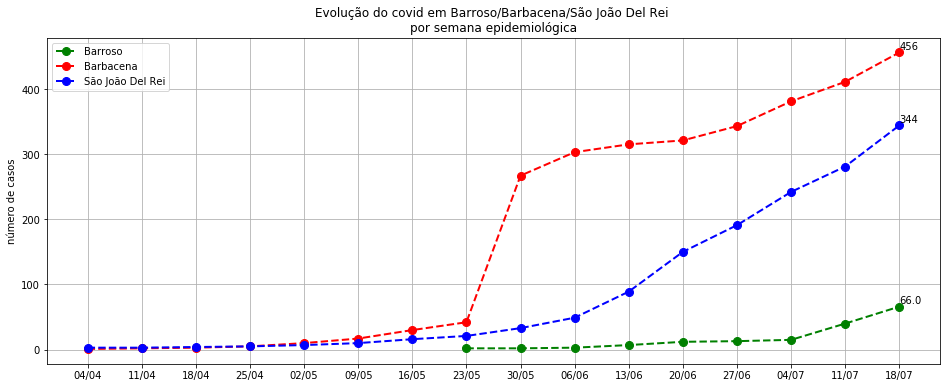

In [28]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (16,6)

ax.plot(df_cidades.date, df_cidades.last_available_confirmed_bso, 
        color='green', marker='o', linestyle='dashed', linewidth=2, 
        markersize=8)


ax.plot(df_cidades.date, df_cidades.last_available_confirmed_bq, 
        color='red', marker='o', linestyle='dashed', linewidth=2, 
        markersize=8)

ax.plot(df_cidades.date, df_cidades.last_available_confirmed_sj, 
        color='blue', marker='o', linestyle='dashed', linewidth=2, 
        markersize=8)

ax.annotate(df_cidades.last_available_confirmed_bso.max(), 
           (df_cidades.index.max(),df_cidades.last_available_confirmed_bso.max()),
           xytext=(df_cidades.index.max(),df_cidades.last_available_confirmed_bso.max() + 5))

ax.annotate(df_cidades.last_available_confirmed_bq.max(), 
           (df_cidades.index.max(),df_cidades.last_available_confirmed_bq.max()),
           xytext=(df_cidades.index.max(),df_cidades.last_available_confirmed_bq.max() + 5))

ax.annotate(df_cidades.last_available_confirmed_sj.max(), 
           (df_cidades.index.max(),df_cidades.last_available_confirmed_sj.max()),
           xytext=(df_cidades.index.max(),df_cidades.last_available_confirmed_sj.max() + 5))
  

plt.legend(['Barroso','Barbacena', 'São João Del Rei'])

ax.set(ylabel='número de casos', xlabel='', title='Evolução do covid em Barroso/Barbacena/São João Del Rei \npor semana epidemiológica')

ax.grid()
fig.savefig('/home/gustavo/Desktop/graficosCovid/EvolucaoNosMunciipios.jpeg')
plt.show()

# Séries com o número absoluto de casos confirmados

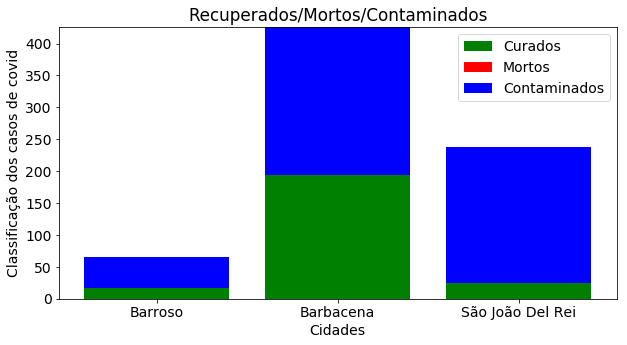

In [130]:
cured_Bso = 17
dead_Bso = 0
infected_Bso = abs(df_cidades.last_available_confirmed_bso.max() - (cured_Bso + dead_Bso))

cured_Bq = 419
dead_Bq = 7
infected_Bq = abs(df_cidades.last_available_confirmed_bq.max() - (cured_Bq + dead_Bq))

cured_Sj = 229
dead_Sj = 9
infected_Sj = abs(df_cidades.last_available_confirmed_sj.max() - (cured_Sj + dead_Sj))

cured = np.array((cured_Bso, cured_Bq, cured_Sj))
dead = np.array((dead_Bso, dead_Bq, dead_Sj))
infected = np.array((infected_Bso, infectded_Bq, infectded_Sj))

cities = ['Barroso', 'Barbacena', 'São João Del Rei']
classifications = ['Curados', 'Mortos', 'Infectados']

plt.figure(figsize=(10,5))

plt.bar(cities, cured, color='green')
plt.bar(cities, dead, color='red', bottom=cured)
plt.bar(cities, infected, color='blue', bottom=cured + dead)

plt.xlabel('Cidades')
plt.ylabel('Classificação dos casos de covid')
plt.title('Recuperados/Mortos/Contaminados')
plt.legend(('Curados', 'Mortos', 'Contaminados'))

plt.show()

In [131]:
dead

array([0, 7, 9])

In [103]:
Bq

array([419,   7,  30])

Barroso

In [72]:
Y_Bso = np.array(dfBso['last_available_confirmed_bso'])
Y_Bso

array([ 2,  2,  3,  7, 12, 13, 15, 40, 66])

In [73]:
X_Bso = []
for index in range(1, len(Y_Bso) + 1):
    X_Bso.append(index)
X_Bso = np.array(X_Bso)
X_Bso

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
X_2d_Bso = []
for index in range(0, len(X_Bso)):
    X_2d_Bso.append([X_Bso[index], Y_Bso[index]])

In [75]:
X_2d_Bso

[[1, 2], [2, 2], [3, 3], [4, 7], [5, 12], [6, 13], [7, 15], [8, 40], [9, 66]]

In [76]:
X_2d_Bso[0][0]

1

Barbacena

In [77]:
Y_Bq = np.array(dfBq['last_available_confirmed_bq'])
Y_Bq

array([  1,   2,   3,   5,  10,  17,  30,  42, 267, 303, 315, 321, 343,
       381, 411, 456])

In [78]:
X_Bq = []
for index in range(1, len(Y_Bq)+1):
    X_Bq.append(index)
X_Bq = np.array(X_Bq)
X_Bq

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [79]:
X_2d_Bq = []
for index in range(0, len(X_Bq)):
    X_2d_Bq.append([X_Bq[index], Y_Bq[index]])

In [80]:
X_2d_Bq

[[1, 1],
 [2, 2],
 [3, 3],
 [4, 5],
 [5, 10],
 [6, 17],
 [7, 30],
 [8, 42],
 [9, 267],
 [10, 303],
 [11, 315],
 [12, 321],
 [13, 343],
 [14, 381],
 [15, 411],
 [16, 456]]

São João Del Rei

In [81]:
Y_Sj = np.array(dfSj['last_available_confirmed_sj'])

In [82]:
X_Sj = []
for index in range(1, len(Y_Sj)+1):
    X_Sj.append(index)
X_Sj = np.array(X_Sj)
X_Sj

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [83]:
X_2d_Sj = []
for index in range(0, len(X_Sj)):
    X_2d_Sj.append([X_Sj[index], Y_Sj[index]])

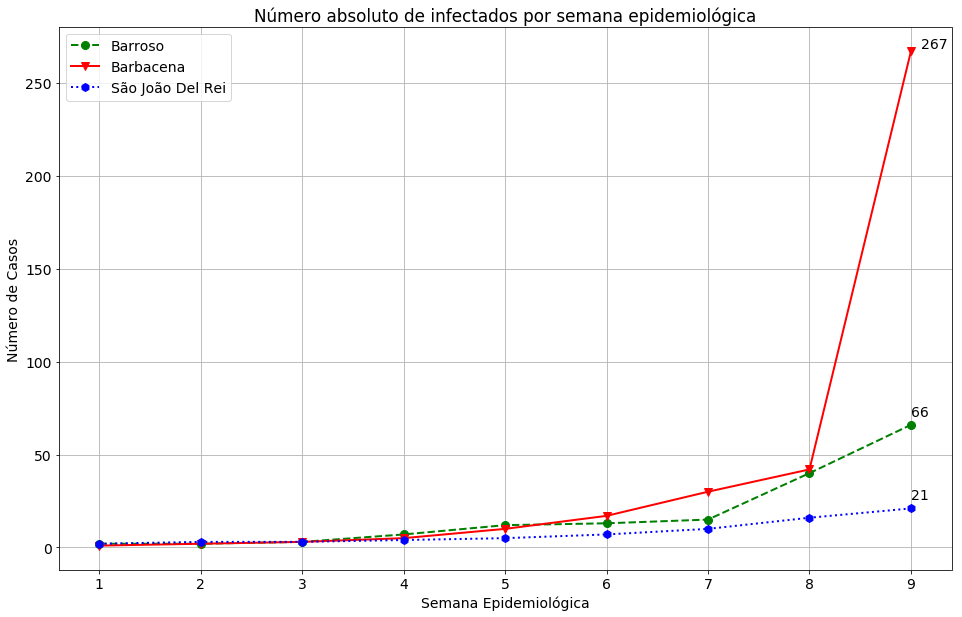

In [84]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams.update({'font.size': 14})

serieBso = np.array(X_2d_Bso)
serieBq = np.array(X_2d_Bq)
serieSj = np.array(X_2d_Sj)

serieBq = serieBq[:len(serieBso), :len(serieBso)]
serieSj = serieSj[:len(serieBso), :len(serieBso)]

plt.plot(serieBso[:, 0], serieBso[:, 1], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=8)
plt.plot(serieBq[:, 0], serieBq[:, 1], color='red', marker='v', linestyle='solid', linewidth=2, markersize=8)
plt.plot(serieSj[:, 0], serieSj[:, 1], color='blue', marker='h', linestyle='dotted', linewidth=2, markersize=8)

ax.annotate(serieBso[:, 1].max(), 
           (serieBso[:, 0].max(), serieBso[:, 1].max()),
           xytext=(serieBso[:, 0].max(), serieBso[:, 1].max() + 5))

ax.annotate(serieBq[:, 1].max(), 
           (serieBq[:, 0].max(), serieBq[:, 1].max()),
           xytext=(serieBq[:, 0].max() + 0.1, serieBq[:, 1].max() + 2))

ax.annotate(serieSj[:, 1].max(), 
           (serieSj[:, 0].max(), serieSj[:, 1].max()),
           xytext=(serieSj[:, 0].max(), serieSj[:, 1].max() + 5))

ax.set(ylabel='Número de Casos', xlabel='Semana Epidemiológica', title='Número absoluto de infectados por semana epidemiológica')

ax.grid()
plt.legend(['Barroso','Barbacena', 'São João Del Rei'])
fig.savefig('/home/gustavo/Desktop/graficosCovid/InfectadosxSemanaAbsolutos.jpeg')
plt.show()

In [101]:
serieBq

array([[  1,   1],
       [  2,   2],
       [  3,   3],
       [  4,   5],
       [  5,  10],
       [  6,  17],
       [  7,  30],
       [  8,  42],
       [  9, 267]])

In [97]:
cured_Bso = 17
dead_Bso = 0
infected_Bso = abs(serieBso[:, 1].max() - (cured_Bso + dead_Bso))
Bso = np.array([cured_Bso, dead_Bso, infected_Bso])

cured_Bq = 419
dead_Bq = 7
infected_Bq = abs(serieBq[:, 1].max() - (cured_Bq + dead_Bq))
Bq = np.array([cured_Bq, dead_Bq, infected_Bq])

cured_Sj = 229
dead_Sj = 9
infected_Sj = abs(serieSj[:, 1].max() - (cured_Sj + dead_Sj))
Sj = np.array([cured_Sj, dead_Sj, infected_Sj])

cities = ['Barroso', 'Barbacena', 'São João Del Rei']
classifications = ['Curados', 'Mortos', 'Infectados']

plt.figure(figsize=(10,5))

plt.bar(cities, Bso, color='gold')
plt.bar(cities, Bq, color='grey', bottom = Bso)
plt.bar(cities, Sj, color='saddlebrown', bottom = Bso + Bq)

plt.xlabel('Cidades')
plt.ylabel('Classificação dos casos de covid')
plt.title('Recuperados/Mortos/Contaminados')
plt.legend(('Curados', 'Mortos', 'Contaminados'))

plt.show()

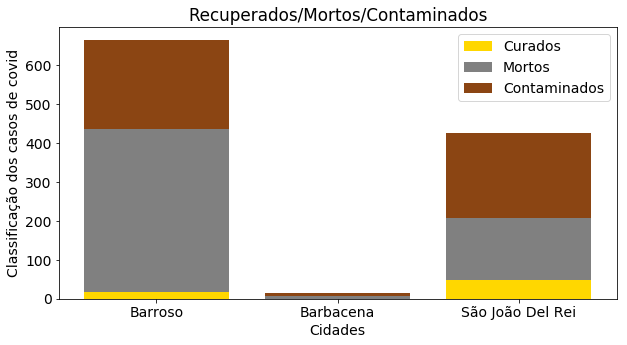

In [99]:
plt.figure(figsize=(10,5))

plt.bar(cities, Bso, color='gold')
plt.bar(cities, Bq, color='grey', bottom = Bso)
plt.bar(cities, Sj, color='saddlebrown', bottom = Bso + Bq)

plt.xlabel('Cidades')
plt.ylabel('Classificação dos casos de covid')
plt.title('Recuperados/Mortos/Contaminados')
plt.legend(('Curados', 'Mortos', 'Contaminados'))

plt.show()

# Séries com o número absoluto de casos confirmados para cada 100 mil habitantes

Barroso

In [44]:
Y_Bso = np.array(dfBso['last_available_confirmed_per_100k_inhabitants_bso'])
Y_Bso

array([  9.61076,   9.61076,  14.41615,  33.63767,  57.66458,  62.46997,
        72.08073, 192.21528, 235.46372])

In [45]:
X_Bso = []
for index in range(1, len(Y_Bso) + 1):
    X_Bso.append(index)
X_Bso = np.array(X_Bso)
X_Bso

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
X_2d_Bso = []
for index in range(0, len(X_Bso)):
    X_2d_Bso.append([X_Bso[index], Y_Bso[index]])

In [47]:
X_2d_Bso

[[1, 9.61076],
 [2, 9.61076],
 [3, 14.41615],
 [4, 33.63767],
 [5, 57.66458],
 [6, 62.46997],
 [7, 72.08073],
 [8, 192.21528],
 [9, 235.46372]]

In [48]:
X_2d_Bso[0][0]

1

Barbacena

In [49]:
Y_Bq = np.array(dfBq['last_available_confirmed_per_100k_inhabitants_bq'])
Y_Bq

array([  0.72826,   1.45653,   2.18479,   3.64132,   7.28263,  12.38047,
        21.84789,  30.58705, 194.44627, 220.66374, 229.4029 , 233.77248,
       249.79427, 277.46827, 299.31616, 320.43579])

In [50]:
X_Bq = []
for index in range(1, len(Y_Bq)+1):
    X_Bq.append(index)
X_Bq = np.array(X_Bq)
X_Bq

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [51]:
X_2d_Bq = []
for index in range(0, len(X_Bq)):
    X_2d_Bq.append([X_Bq[index], Y_Bq[index]])

In [52]:
X_2d_Bq

[[1, 0.72826],
 [2, 1.45653],
 [3, 2.18479],
 [4, 3.64132],
 [5, 7.28263],
 [6, 12.38047],
 [7, 21.84789],
 [8, 30.58705],
 [9, 194.44627],
 [10, 220.66374],
 [11, 229.4029],
 [12, 233.77248],
 [13, 249.79427],
 [14, 277.46827],
 [15, 299.31616],
 [16, 320.43579]]

São João Del Rei

In [53]:
Y_Sj = np.array(dfSj['last_available_confirmed_per_100k_inhabitants_sj'])

In [54]:
X_Sj = []
for index in range(1, len(Y_Sj)+1):
    X_Sj.append(index)
X_Sj = np.array(X_Sj)
X_Sj

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [55]:
X_2d_Sj = []
for index in range(0, len(X_Sj)):
    X_2d_Sj.append([X_Sj[index], Y_Sj[index]])

In [56]:
X_2d_Bso

[[1, 9.61076],
 [2, 9.61076],
 [3, 14.41615],
 [4, 33.63767],
 [5, 57.66458],
 [6, 62.46997],
 [7, 72.08073],
 [8, 192.21528],
 [9, 235.46372]]

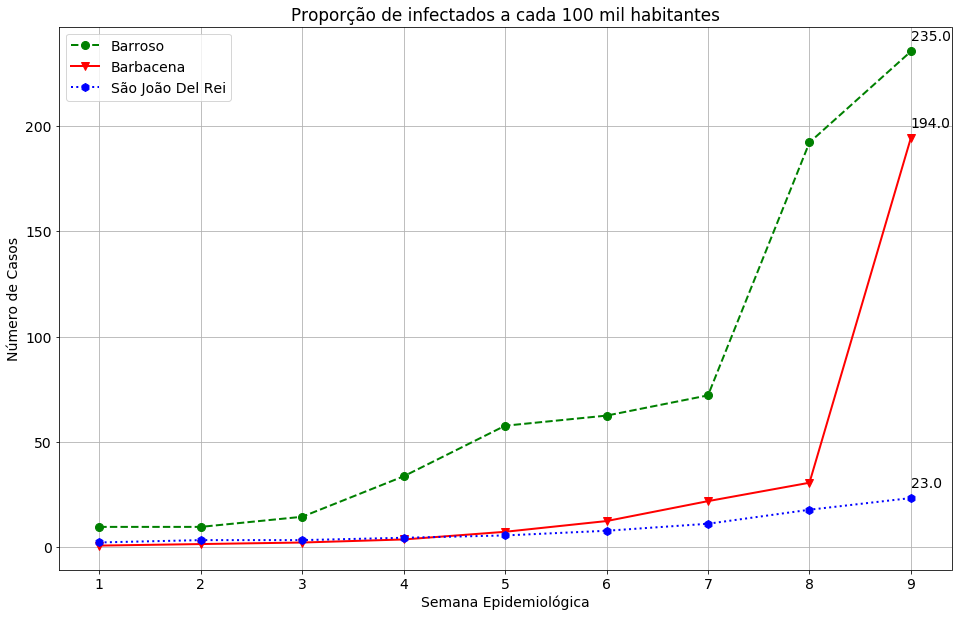

In [57]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams.update({'font.size': 14})

serieBso = np.array(X_2d_Bso)
serieBq = np.array(X_2d_Bq)
serieSj = np.array(X_2d_Sj)

serieBq = serieBq[:len(serieBso), :len(serieBso)]
serieSj = serieSj[:len(serieBso), :len(serieBso)]



plt.plot(serieBso[:, 0], serieBso[:, 1], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=8)
plt.plot(serieBq[:, 0], serieBq[:, 1], color='red', marker='v', linestyle='solid', linewidth=2, markersize=8)
plt.plot(serieSj[:, 0], serieSj[:, 1], color='blue', marker='h', linestyle='dotted', linewidth=2, markersize=8)

ax.annotate(serieBso[:, 1].max().round(), 
           (serieBso[:, 0].max(), serieBso[:, 1].max()),
           xytext=(serieBso[:, 0].max(), serieBso[:, 1].max() + 5))

ax.annotate(serieBq[:, 1].max().round(), 
           (serieBq[:, 0].max(), serieBq[:, 1].max()),
           xytext=(serieBq[:, 0].max(), serieBq[:, 1].max() + 5))

ax.annotate(serieSj[:, 1].max().round(), 
           (serieSj[:, 0].max(), serieSj[:, 1].max().round()),
           xytext=(serieSj[:, 0].max(), serieSj[:, 1].max() + 5))

ax.set(ylabel='Número de Casos', xlabel='Semana Epidemiológica', title='Proporção de infectados a cada 100 mil habitantes')

ax.grid()
plt.legend(['Barroso','Barbacena', 'São João Del Rei'])
fig.savefig('/home/gustavo/Desktop/graficosCovid/InfectadosxSemanaProporcionais.jpeg')
plt.show()

In [71]:
Bso

array([ 17.     ,   0.     , 218.46372])

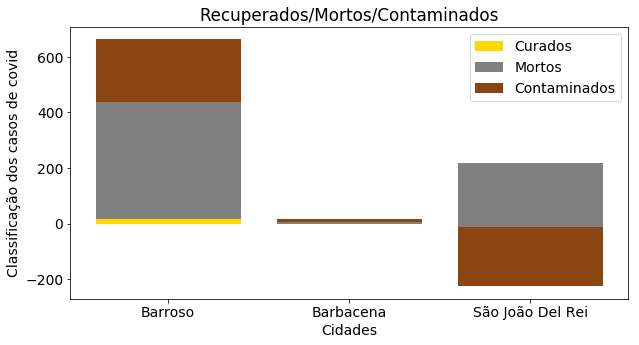

In [70]:
plt.figure(figsize=(10,5))

plt.bar(cities, Bso, color='gold')
plt.bar(cities, Bq, color='grey', bottom = Bso)
plt.bar(cities, Sj, color='saddlebrown', bottom = Bso + Bq)

plt.xlabel('Cidades')
plt.ylabel('Classificação dos casos de covid')
plt.title('Recuperados/Mortos/Contaminados')
plt.legend(('Curados', 'Mortos', 'Contaminados'))

plt.show()

In [58]:
serieSj[:, 1].max().round()

23.0

In [61]:
dfGrowRate = pd.DataFrame(serieBso)
dfGrowRate = dfGrowRate.set_index(0)
dfGrowRate['pdt_chg']=dfGrowRate[1].pct_change()
dfGrowRate = dfGrowRate.fillna(0)
dfGrowRate

,1,pdt_chg
0,,
1.0,9.61076,0.000000
2.0,9.61076,0.000000
3.0,14.41615,0.500001
4.0,33.63767,1.333332
5.0,57.66458,0.714286
6.0,62.46997,0.083333
7.0,72.08073,0.153846
8.0,192.21528,1.666667
9.0,235.46372,0.225000


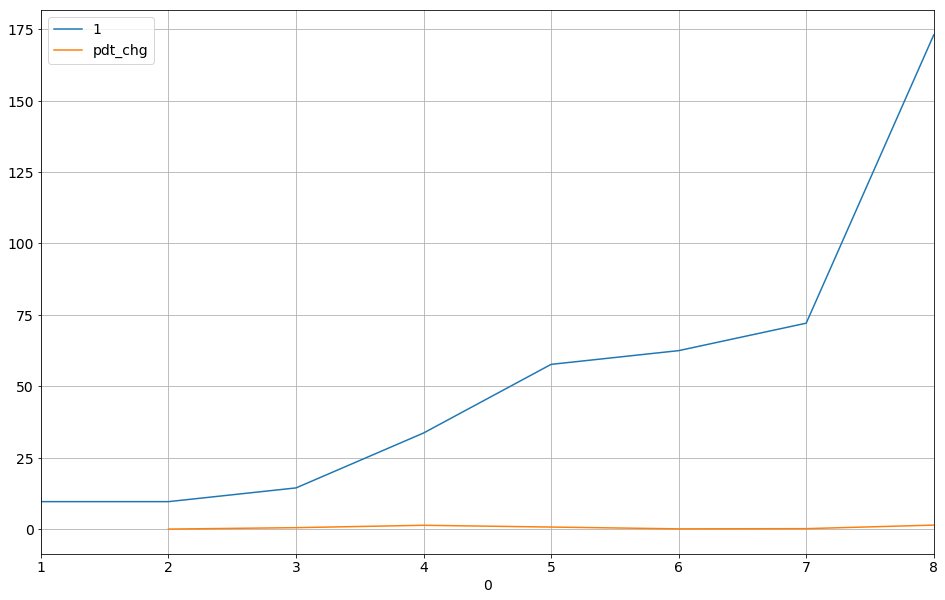

In [64]:
df.plot(grid=True)

In [65]:
serieBq

array([[  1.     ,   0.72826],
       [  2.     ,   1.45653],
       [  3.     ,   2.18479],
       [  4.     ,   3.64132],
       [  5.     ,   7.28263],
       [  6.     ,  12.38047],
       [  7.     ,  21.84789],
       [  8.     ,  30.58705],
       [  9.     , 194.44627]])

In [73]:
print(len(serieBso))

7


In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
Y

array([ 2,  2,  3,  7, 12, 13, 15, 27])

In [154]:
X_a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [155]:
X_b

array([ 0,  2,  2,  3,  7, 12, 13, 15])

In [156]:
X_reshape = X_b.reshape(-1,1)
reg = LinearRegression().fit(X_reshape, Y)

In [157]:
reg.score(X_reshape, Y)

0.8559392104254895

In [158]:
reg.coef_

array([1.35386221])

In [159]:
reg.intercept_

0.9864300626304789

In [160]:
reg.predict(np.array([[44]]))

array([60.55636743])

In [161]:
from sklearn.linear_model import RANSACRegressor
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear', C=100, gamma='auto').fit(X_reshape, Y)

In [163]:
svr_lin.predict(np.array([[44]]))

array([46.57692308])

In [164]:
day = []
predict_lin = np.array([[44]])
for i in range(0, 5):
    result = reg.predict([predict_lin[i]])
    predict_lin = np.concatenate((predict_lin, np.array([result])))
    day.append(i)

In [167]:
predict_lin

array([[ 44.        ],
       [ 60.55636743],
       [ 82.97140768],
       [113.31828368],
       [154.40377237],
       [210.02786301]])

In [93]:
Y = np.array(dfBq['last_available_confirmed_bq'])
Y

array([  1,   2,   3,   5,  10,  17,  30,  42, 267, 303, 315, 321, 343,
       381, 386])